In [83]:
#!pip install PVGeo

In [45]:
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray
import pyvista as pv

import PVGeo
from PVGeo.filters import VoxelizePoints


Data
https://energymining.sa.gov.au/minerals/geoscience/geoscientific_data/3d_geological_models/sagrm

## Grid Example
\*  
\*   X   Y   Z  Conductivity  I   J   K  
\*  
339282.7 7338231.4   131.8   0.218729    0    0    0  
339291.9 7338231.8   131.7   0.207454    1    0    0   
339301.0 7338232.2   131.6   0.206051    2    0    0   
339310.2 7338232.7   131.5   0.201894    3    0    0   
339319.4 7338233.1   131.4   0.194041    4    0    0  
339328.6 7338233.5   131.6   0.180258    5    0    0   
339337.8 7338234.0   131.4   0.175926    6    0    0   
339347.0 7338234.4   131.2   0.182470    7    0    0   
339356.2 7338234.8   131.0   0.190379    8    0    0   
339365.4 7338235.2   130.5   0.216839    9    0    0   


### Load Data
This format is simply handled by numpy directly

In [4]:
Points = np.loadtxt(r"J:\Richard_Scott\Gravity_Inversion_Constrained SA_Geophysics_Reference_Model_SGrid_ASCIIGravity_Inversion_Constrained__ascii@@", skiprows = 3) #Loading the data only
mesh_points = Points[:,0:3]   ##x, y, z and conductivity

### Point Cloud
View as a point cloud

In [26]:
Points[:,4:7].max(axis=0) + 1

array([333., 378.,  29.])

In [35]:
np.unique(Points[:,1]).size

378

In [36]:
zrng = np.unique(Points[:,2])
yrng = np.unique(Points[:,1])
xrng = np.unique(Points[:,0])

In [5]:
point_cloud = pv.PolyData(mesh_points)
point_cloud['density'] = Points[:,3]
#point_cloud['logCon'] = np.log(Points[:,3])  #make a log of the conductivity for display

In [6]:
point_cloud

PolyData (0x1e2019765e0)
  N Cells:	3650346
  N Points:	3650346
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, 0.000e+00
  N Arrays:	1

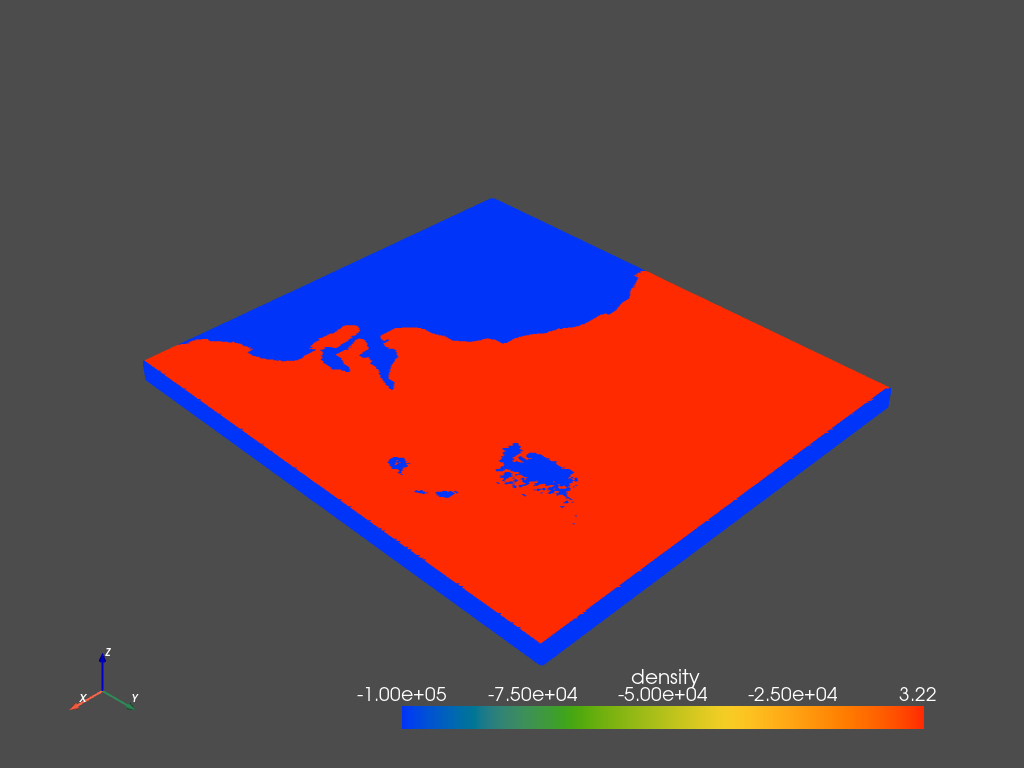

[(2725849.5439456413, 8747849.54394564, 2217349.5439456413),
 (484000.0, 6506000.0, -24500.0),
 (0.0, 0.0, 1.0)]

In [5]:
point_cloud.plot(cmap="rainbow", notebook=True, scalars='density')

In [10]:
thres = point_cloud.threshold([0,10], scalars='density', invert=False)
thres.plot(cpos=(1,-5,8))

TypeError: threshold() got an unexpected keyword argument 'cpos'

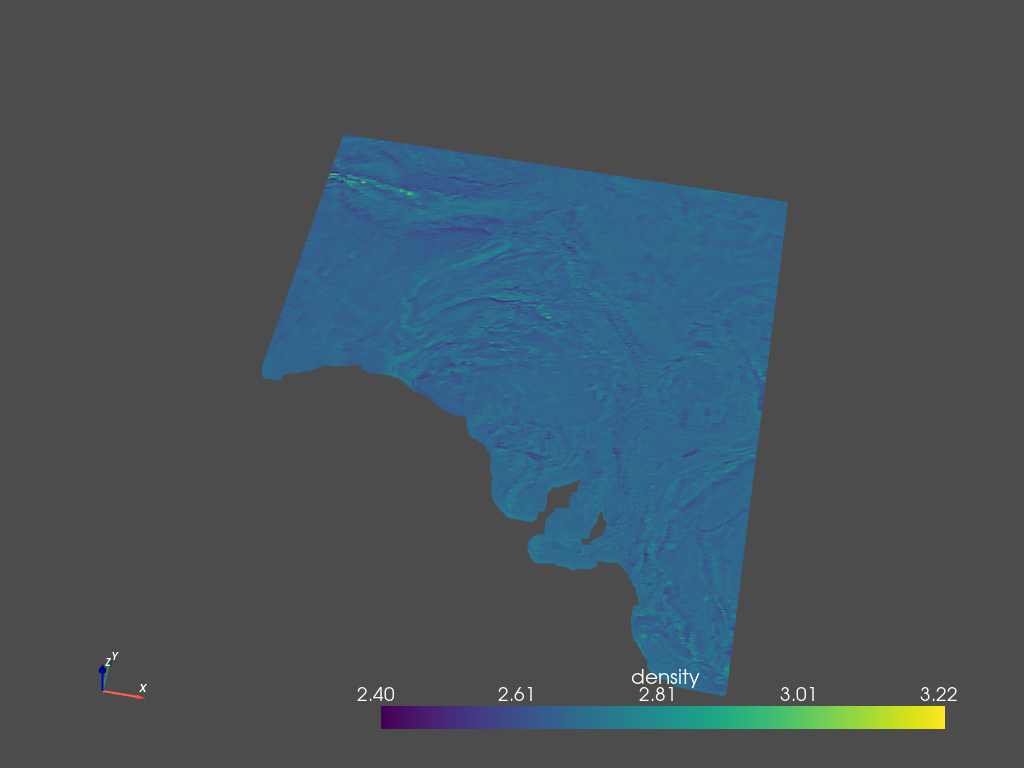

[(890135.4832088088, 4463322.583955956, 3242583.865670471),
 (482000.0, 6504000.0, -22500.0),
 (0.0, 0.0, 1.0)]

In [12]:
thres.plot(cpos=(1,-5,8))

In [14]:
thres.plot(cpos=(1,-5,8), notebook=False)

[(2260128.951254921, 3626097.9602014483, 1861020.326649103),
 (482000.0, 6504000.0, -22500.0),
 (-0.02196527975744103, 0.5379500573889678, 0.842690490180341)]

In [15]:
thres

UnstructuredGrid (0x22436e71c40)
  N Cells:	2182118
  N Points:	2182118
  X Bounds:	-1.800e+05, 1.144e+06
  Y Bounds:	5.752e+06, 7.256e+06
  Z Bounds:	-4.500e+04, 0.000e+00
  N Arrays:	1

In [20]:
point_cloud.points

pyvista_ndarray([[-180000., 5752000.,       0.],
                 [-176000., 5752000.,       0.],
                 [-172000., 5752000.,       0.],
                 ...,
                 [1140000., 7260000.,  -49000.],
                 [1144000., 7260000.,  -49000.],
                 [1148000., 7260000.,  -49000.]])

In [21]:
values = np.linspace(0, 10, 1000).reshape((20, 5, 10))
values.shape
SARef = pv.UniformGrid()

In [22]:
point_cloud.points.min(axis=0)

pyvista_ndarray([-180000., 5752000.,  -49000.])

In [23]:
SARef.dimensions = (333, 378,  29)
SARef.origin = (-180000, 5752000,  -49000)
SARef.spacing = (4000, 4000, 1000)

In [24]:
#SARef["density"] = point_cloud["density"].flatten(order="F")
SARef["density"] = Points[:,3]

In [25]:
SARef

UniformGrid (0x1e2019fd9a0)
  N Cells:	3504592
  N Points:	3650346
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, -2.100e+04
  Dimensions:	333, 378, 29
  Spacing:	4.000e+03, 4.000e+03, 1.000e+03
  N Arrays:	1

In [26]:
SARef.set_active_scalars("density")
SARef

UniformGrid (0x1e2019fd9a0)
  N Cells:	3504592
  N Points:	3650346
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, -2.100e+04
  Dimensions:	333, 378, 29
  Spacing:	4.000e+03, 4.000e+03, 1.000e+03
  N Arrays:	1

In [32]:
#print(SARef.threshold(value=-10, invert=True)['density'].min())
SARef.threshold(value=1.21, invert=False)

vtkThreshold (000001E27F7C0A40)
  Debug: Off
  Modified Time: 56168
  Reference Count: 2
  Registered Events: (none)
  Executive: 000001E225500070
  ErrorCode: No error
  Information: 000001E2259B13A0
  AbortExecute: Off
  Progress: 1
  Progress Text: (None)
  Attribute Mode: UseCellData
  Component Mode: UseSelected
  Selected Component: 0
  All Scalars: 0
  Threshold By Upper
  Lower Threshold: 0
  Upper Threshold: 1.21
  Precision of the output points: 2
  Use Continuous Cell Range: 0


vtkUnstructuredGrid (000001E27F5BAED0)
  Debug: Off
  Modified Time: 56380
  Reference Count: 2
  Registered Events: (none)
  Information: 000001E2259B14E0
  Data Released: False
  Global Release Data: Off
  UpdateTime: 56381
  Field Data:
    Debug: Off
    Modified Time: 56328
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 2318008
  Number Of Cells: 2203230
  Cell Data:
    Debug: Off
    Modified 

UnstructuredGrid (0x1e2036ef2e0)
  N Cells:	2203230
  N Points:	2318008
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, -2.100e+04
  N Arrays:	1

In [172]:
SARef = SARef.ptc()

In [13]:
thresSA = SARef.threshold([0,10], scalars='density', invert=False, preference='cells')
#thresSA.plot(cpos=(1,-5,8))

vtkThreshold (000001E27EE68C60)
  Debug: Off
  Modified Time: 241
  Reference Count: 2
  Registered Events: (none)
  Executive: 000001E27ED5B390
  ErrorCode: No error
  Information: 000001E2660E3680
  AbortExecute: Off
  Progress: 1
  Progress Text: (None)
  Attribute Mode: UseCellData
  Component Mode: UseSelected
  Selected Component: 0
  All Scalars: 0
  Threshold Between
  Lower Threshold: 0
  Upper Threshold: 10
  Precision of the output points: 2
  Use Continuous Cell Range: 0


vtkUnstructuredGrid (000001E27F5B7690)
  Debug: Off
  Modified Time: 456
  Reference Count: 2
  Registered Events: (none)
  Information: 000001E264A796A0
  Data Released: False
  Global Release Data: Off
  UpdateTime: 457
  Field Data:
    Debug: Off
    Modified Time: 404
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 2318008
  Number Of Cells: 2203230
  Cell Data:
    Debug: Off
    Modified Time: 429
 

In [37]:
SARect = pv.RectilinearGrid(xrng, yrng, zrng)

In [38]:
SARect

RectilinearGrid,Information
N Cells,3504592
N Points,3650346
X Bounds,"-1.800e+05, 1.148e+06"
Y Bounds,"5.752e+06, 7.260e+06"
Z Bounds,"-4.900e+04, 0.000e+00"
Dimensions,"333, 378, 29"
N Arrays,0


In [39]:
SARect['density'] = Points[:,3]

In [40]:
SARect

RectilinearGrid (0x1e2036b56a0)
  N Cells:	3504592
  N Points:	3650346
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, 0.000e+00
  Dimensions:	333, 378, 29
  N Arrays:	1

In [42]:
thresRect = SARect.threshold(1.0)
thresRect

vtkThreshold (000001E27F7C0080)
  Debug: Off
  Modified Time: 56623
  Reference Count: 2
  Registered Events: (none)
  Executive: 000001E2254F9B30
  ErrorCode: No error
  Information: 000001E2259B0D60
  AbortExecute: Off
  Progress: 1
  Progress Text: (None)
  Attribute Mode: UseCellData
  Component Mode: UseSelected
  Selected Component: 0
  All Scalars: 0
  Threshold By Upper
  Lower Threshold: 0
  Upper Threshold: 1
  Precision of the output points: 2
  Use Continuous Cell Range: 0


vtkUnstructuredGrid (000001E27F5B7C30)
  Debug: Off
  Modified Time: 56821
  Reference Count: 2
  Registered Events: (none)
  Information: 000001E2259B2110
  Data Released: False
  Global Release Data: Off
  UpdateTime: 56822
  Field Data:
    Debug: Off
    Modified Time: 56769
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 2318008
  Number Of Cells: 2203230
  Cell Data:
    Debug: Off
    Modified Tim

UnstructuredGrid (0x1e2027bdb80)
  N Cells:	2203230
  N Points:	2318008
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, 0.000e+00
  N Arrays:	1

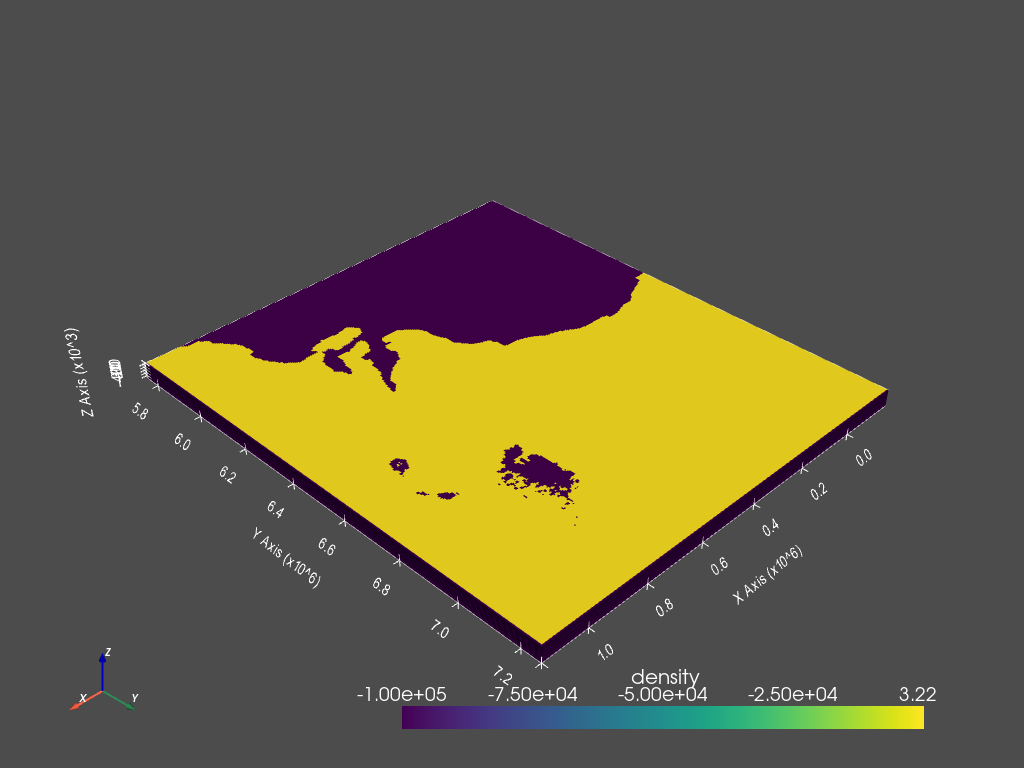

[(2732192.7411096897, 8754192.74110969, 2223692.7411096897),
 (484000.0, 6506000.0, -24500.0),
 (0.0, 0.0, 1.0)]

In [46]:
voxelizer = PVGeo.filters.VoxelizePoints()
voxelizer.set_deltas(4000, 4000, 1000) # Your block sizes in dx, dy, dz
voxelizer.set_estimate_grid(True) # This is crucial for this point cloud
grid = voxelizer.apply(point_cloud)
grid.plot(notebook=True, show_grid=True)


In [47]:
grid

UnstructuredGrid (0x1e201a59040)
  N Cells:	3650346
  N Points:	7341988
  X Bounds:	-1.820e+05, 1.150e+06
  Y Bounds:	5.750e+06, 7.262e+06
  Z Bounds:	-4.988e+04, 8.750e+02
  N Arrays:	3

In [48]:
thresVox = grid.threshold(1.0)
thresVox

vtkThreshold (000001E22B68B6D0)
  Debug: Off
  Modified Time: 182321
  Reference Count: 2
  Registered Events: (none)
  Executive: 000001E22B75AD50
  ErrorCode: No error
  Information: 000001E226266700
  AbortExecute: Off
  Progress: 1
  Progress Text: (None)
  Attribute Mode: UseCellData
  Component Mode: UseSelected
  Selected Component: 0
  All Scalars: 0
  Threshold By Upper
  Lower Threshold: 0
  Upper Threshold: 1
  Precision of the output points: 2
  Use Continuous Cell Range: 0


vtkUnstructuredGrid (000001E2662169F0)
  Debug: Off
  Modified Time: 7483224
  Reference Count: 2
  Registered Events: (none)
  Information: 000001E226267F60
  Data Released: False
  Global Release Data: Off
  UpdateTime: 7483225
  Field Data:
    Debug: Off
    Modified Time: 182473
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 2
    Array 0 name = Recovered Angle (Deg.)
    Array 1 name = Recovered Cell Sizes
    Number Of Components: 4
    Number Of Tuples: 1
  Number Of

UnstructuredGrid (0x1e20c8136a0)
  N Cells:	2182118
  N Points:	4417192
  X Bounds:	-1.820e+05, 1.146e+06
  Y Bounds:	5.750e+06, 7.258e+06
  Z Bounds:	-4.588e+04, 8.750e+02
  N Arrays:	3

In [49]:
thresVox

UnstructuredGrid (0x1e20c8136a0)
  N Cells:	2182118
  N Points:	4417192
  X Bounds:	-1.820e+05, 1.146e+06
  Y Bounds:	5.750e+06, 7.258e+06
  Z Bounds:	-4.588e+04, 8.750e+02
  N Arrays:	3

In [67]:
#calculate x, y and z cell sizes
#Points[:,2][0:29]
print(zrng)
zdiff = np.diff(zrng)
print(zdiff)
print(zdiff.size)
zdiff = np.append(zdiff, 1000)
zdiff = np.flip(zdiff)
print(zdiff)
print(zdiff.size)

xarray = np.full(Points[:,3].size, 4000)
yarray = np.full(Points[:,3].size, 4000)
zarray = np.zeros((Points[:,3].size))
#zarray.shape
zlen = xrng.size * yrng.size
for index, csize in enumerate(zdiff):
    zarray[zlen*index:zlen+zlen*index] = csize
    
    
print(zarray.shape)
print(zarray)

[-49000. -45000. -41000. -39000. -37000. -35000. -33000. -31000. -29000.
 -27000. -25000. -23000. -21000. -19000. -17000. -15000. -13000. -11000.
 -10000.  -9000.  -8000.  -7000.  -6000.  -5000.  -4000.  -3000.  -2000.
  -1000.      0.]
[4000. 4000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000.]
28
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 4000. 4000.]
29
(3650346,)
[1000. 1000. 1000. ... 4000. 4000. 4000.]


In [68]:
voxelizer2 = PVGeo.filters.VoxelizePoints(unique=True, estimate=False)
voxelizer2.set_deltas(xarray, yarray, zarray)
grid2 = voxelizer2.apply(point_cloud)
#grid2.plot(notebook=True, show_grid=True)


p = pv.Plotter(notebook=False)
p.add_mesh(grid2)
p.show_grid()
p.add_axes()
p.show()


[(2732213.958173703, 8754213.958173703, 2222963.958173703),
 (484000.0, 6506000.0, -25250.0),
 (0.0, 0.0, 1.0)]

In [69]:
grid2

UnstructuredGrid (0x1e20c813ee0)
  N Cells:	3650346
  N Points:	4050752
  X Bounds:	-1.820e+05, 1.150e+06
  Y Bounds:	5.750e+06, 7.262e+06
  Z Bounds:	-5.100e+04, 5.000e+02
  N Arrays:	1

In [71]:
thresVox2 = grid2.threshold(0.1)
thresVox2

vtkThreshold (000001E226729E10)
  Debug: Off
  Modified Time: 7733065
  Reference Count: 2
  Registered Events: (none)
  Executive: 000001E2F3AFC610
  ErrorCode: No error
  Information: 000001E225D003D0
  AbortExecute: Off
  Progress: 1
  Progress Text: (None)
  Attribute Mode: UseCellData
  Component Mode: UseSelected
  Selected Component: 0
  All Scalars: 0
  Threshold By Upper
  Lower Threshold: 0
  Upper Threshold: 0.1
  Precision of the output points: 2
  Use Continuous Cell Range: 0


vtkUnstructuredGrid (000001E22BB277C0)
  Debug: Off
  Modified Time: 15033964
  Reference Count: 2
  Registered Events: (none)
  Information: 000001E2569B24F0
  Data Released: False
  Global Release Data: Off
  UpdateTime: 15033965
  Field Data:
    Debug: Off
    Modified Time: 7733200
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 2392944
  Number Of Cells: 2182118
  Cell Data:
    Debug: Off
    

UnstructuredGrid (0x1e20cd8a6a0)
  N Cells:	2182118
  N Points:	2392944
  X Bounds:	-1.820e+05, 1.146e+06
  Y Bounds:	5.750e+06, 7.258e+06
  Z Bounds:	-4.700e+04, 5.000e+02
  N Arrays:	1

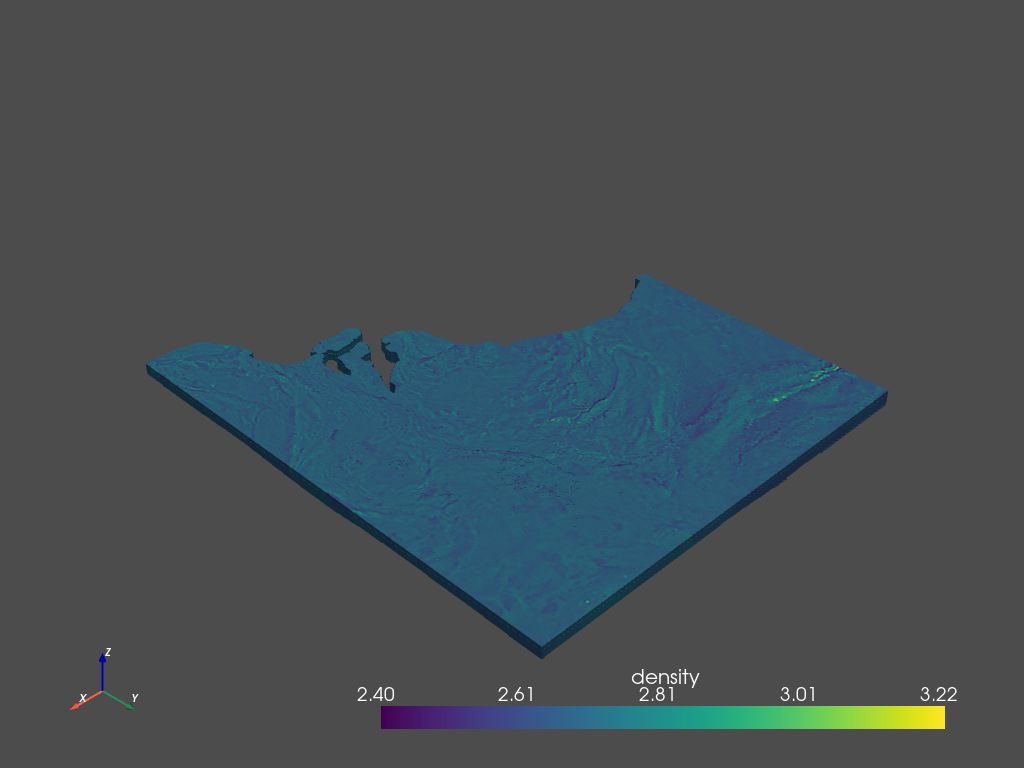

[(2723809.382226289, 8745809.382226288, 2218559.382226289),
 (482000.0, 6504000.0, -23250.0),
 (0.0, 0.0, 1.0)]

In [73]:
thresVox2.plot()

In [70]:
print('Recovered Angle (deg.): %.3f' % voxelizer2.get_angle())
print('Recovered Cell Sizes: (%.2f, %.2f, %.2f)' % voxelizer2.get_spacing())
print(grid2)

Recovered Angle (deg.): 0.000


TypeError: only size-1 arrays can be converted to Python scalars

In [14]:
thresSA

UnstructuredGrid (0x1e201976c40)
  N Cells:	2203230
  N Points:	2318008
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, -2.100e+04
  N Arrays:	1

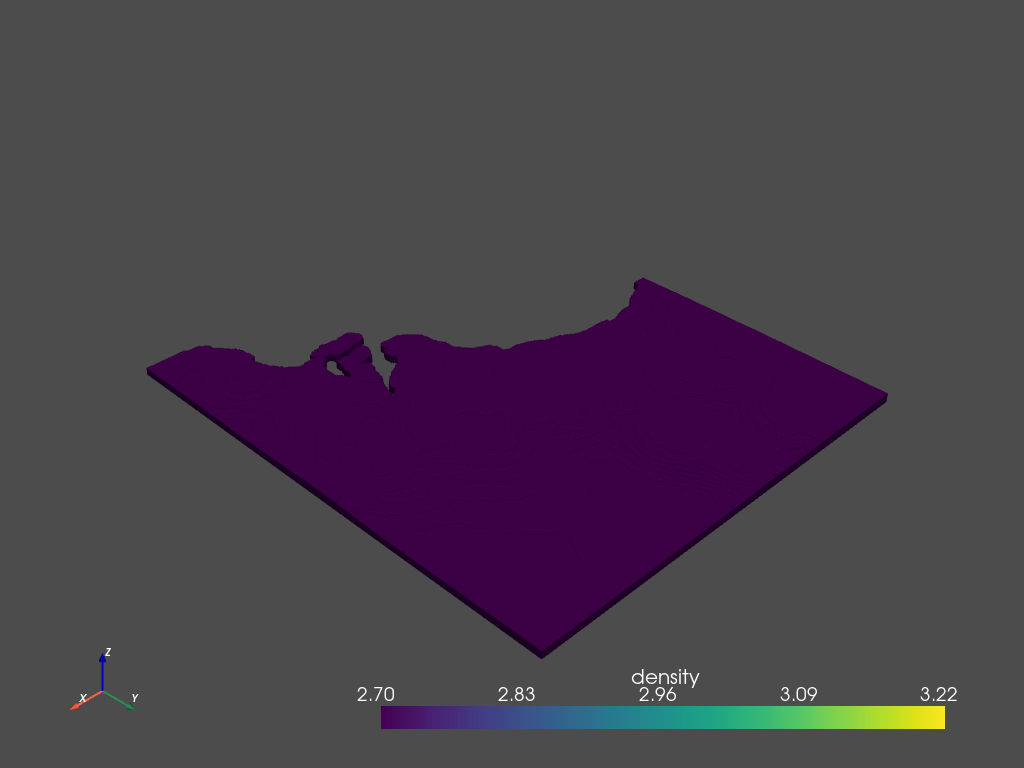

[(2725400.857121278, 8747400.857121278, 2206400.857121278),
 (484000.0, 6506000.0, -35000.0),
 (0.0, 0.0, 1.0)]

In [19]:
thresSA.plot(scalars='density', clim=(2.7,3.219))

In [39]:
thres.plot(cpos=(1,-5,8), notebook=False)

[(512087.74137075245, 6388315.63435098, 14919.615450504665),
 (482000.0, 6504000.0, -22500.0),
 (0.023665705608395815, 0.3132437257386493, 0.9493778503122068)]

In [54]:
thresSA

UnstructuredGrid (0x22407940c40)
  N Cells:	2203230
  N Points:	2318008
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, -2.100e+04
  N Arrays:	1

In [55]:
thresSA.plot(notebook=False)

[(1263068.4367892893, 6799180.051388267, -179662.2702306822),
 (484000.0, 6506000.0, -35000.0),
 (0.1657804697158746, 0.045548632345260534, 0.9851102262956468)]

In [72]:
#SARef.threshold([0,10], scalars='density', invert=False, continuous=True)
SARef.threshold((1.0,2.0),scalars='density', invert=True, continuous=True)

UnstructuredGrid (0x22407970040)
  N Cells:	3638296
  N Points:	3920239
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, -2.100e+04
  N Arrays:	1

In [101]:
point_cloud.threshold(1.0)

UnstructuredGrid (0x22407a1abe0)
  N Cells:	2182118
  N Points:	2182118
  X Bounds:	-1.800e+05, 1.144e+06
  Y Bounds:	5.752e+06, 7.256e+06
  Z Bounds:	-4.500e+04, 0.000e+00
  N Arrays:	1

In [102]:
SARef2 = SARef.point_data_to_cell_data()

In [103]:
SARef2

UniformGrid (0x22407a323a0)
  N Cells:	3504592
  N Points:	3650346
  X Bounds:	-1.800e+05, 1.148e+06
  Y Bounds:	5.752e+06, 7.260e+06
  Z Bounds:	-4.900e+04, -2.100e+04
  Dimensions:	333, 378, 29
  Spacing:	4.000e+03, 4.000e+03, 1.000e+03
  N Arrays:	1

In [104]:
SARef2.threshold(1.1)

UnstructuredGrid (0x22407a1a340)
  N Cells:	2069526
  N Points:	2182005
  X Bounds:	-1.800e+05, 1.144e+06
  Y Bounds:	5.752e+06, 7.256e+06
  Z Bounds:	-4.900e+04, -2.200e+04
  N Arrays:	1

In [75]:
Points_All = np.loadtxt(r"J:\Richard_Scott\Gravity_Inversion_Constrained SA_Geophysics_Reference_Model_SGrid_ASCIISA_Geophysics_Reference_Model_SGrid__ascii@@", skiprows = 3) #Loading the data only


In [76]:
names_list = ['Rock_Unit','Gravity_Inversion_Unconstrained','Magnetic_Inversion_Unconstrained','Magnetic_Inversion_Constrained',
              'Gravity_Inversion_Constrained','SA_Geophysics_Magnetotellurics_Gawler_Resistivity','SA_Geophysics_AusREM_Crust_Vp',
              'SA_Geophysics_AusREM_Crust_Vsv','SA_Geophysics_AusREM_Crust_rho','SA_Geophysics_AWAGS_Log_Resistivity'] 



In [77]:
mesh_points_all = Points_All[:,0:3]   ##x, y, z and first data

In [78]:
point_cloud_all = pv.PolyData(mesh_points_all)

In [79]:
point_cloud_all

PolyData,Information
N Cells,8196200
N Points,8196200
X Bounds,"-2.800e+05, 1.248e+06"
Y Bounds,"5.652e+06, 7.360e+06"
Z Bounds,"-1.010e+05, 8.000e+03"
N Arrays,0


In [80]:
for index, n in enumerate(names_list):
    point_cloud_all[n] = Points_All[:,3+index]

In [81]:
point_cloud_all

PolyData (0x1e210c68f40)
  N Cells:	8196200
  N Points:	8196200
  X Bounds:	-2.800e+05, 1.248e+06
  Y Bounds:	5.652e+06, 7.360e+06
  Z Bounds:	-1.010e+05, 8.000e+03
  N Arrays:	10

In [87]:
zrng_all = np.unique(Points_All[:,2])
yrng_all = np.unique(Points_All[:,1])
xrng_all = np.unique(Points_All[:,0])

print(zrng_all)
#print(xrng_all)

#calculate x, y and z cell sizes
#Points[:,2][0:29]
zdiff_all = np.diff(zrng_all)
print(zdiff_all)
print(zdiff_all.size)
zdiff_all = np.append(zdiff_all, 1000)
zdiff_all = np.flip(zdiff_all)
print(zdiff_all)
print(zdiff_all.size)

xarray_all = np.full(Points_All[:,3].size, 4000)
yarray_all = np.full(Points_All[:,3].size, 4000)
zarray_all = np.zeros((Points_All[:,3].size))
#zarray.shape
zlen_all = xrng_all.size * yrng_all.size
for index, csize_all in enumerate(zdiff_all):
    zarray_all[zlen_all*index:zlen_all+zlen_all*index] = csize_all
    
    
print(zarray_all.shape)
print(zarray_all)

[-101000.  -97000.  -93000.  -89000.  -85000.  -81000.  -77000.  -73000.
  -69000.  -65000.  -61000.  -57000.  -53000.  -49000.  -45000.  -41000.
  -39000.  -37000.  -35000.  -33000.  -31000.  -29000.  -27000.  -25000.
  -23000.  -21000.  -19000.  -17000.  -15000.  -13000.  -11000.  -10000.
   -9000.   -8000.   -7000.   -6000.   -5000.   -4000.   -3000.   -2000.
   -1000.       0.    1000.    2000.    3000.    4000.    5000.    6000.
    7000.    8000.]
[4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000. 4000.
 4000. 4000. 4000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000.]
49
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 4000.
 4000. 4000. 4000. 4

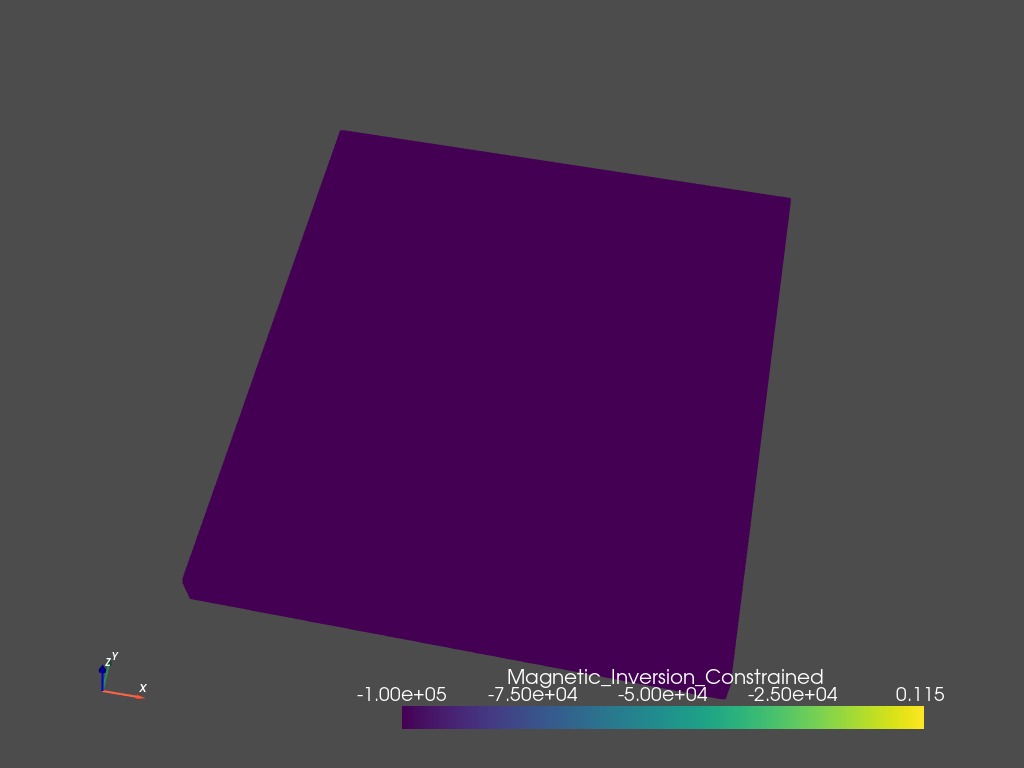

[(951205.0522395591, 4169974.738802204, 3691140.4179164735),
 (484000.0, 6506000.0, -46500.0),
 (0.0, 0.0, 1.0)]

In [116]:
point_cloud_all.plot(scalars='Magnetic_Inversion_Constrained', cpos=(1,-5,8))

In [188]:
#thresm = point_cloud_all.threshold(0, scalars='Magnetic_Inversion_Constrained', all_scalars=True)
thresm3 = point_cloud_all.threshold(value=0.0, all_scalars=True)

ValueError: Setting `all_scalars=True` and designating `scalars` is incompatible.  Set one or the other but not both

In [190]:
point_cloud_all

PolyData (0x22407a1af40)
  N Cells:	8196200
  N Points:	8196200
  X Bounds:	-2.800e+05, 1.248e+06
  Y Bounds:	5.652e+06, 7.360e+06
  Z Bounds:	-1.010e+05, 8.000e+03
  N Arrays:	10

In [191]:
thresm3 = point_cloud_all.threshold(value=0.05, all_scalars=True)

ValueError: Setting `all_scalars=True` and designating `scalars` is incompatible.  Set one or the other but not both

In [185]:
thresm2

UnstructuredGrid (0x22407b0d220)
  N Cells:	7992582
  N Points:	7992582
  X Bounds:	-2.800e+05, 1.244e+06
  Y Bounds:	5.652e+06, 7.356e+06
  Z Bounds:	-9.700e+04, 8.000e+03
  N Arrays:	10

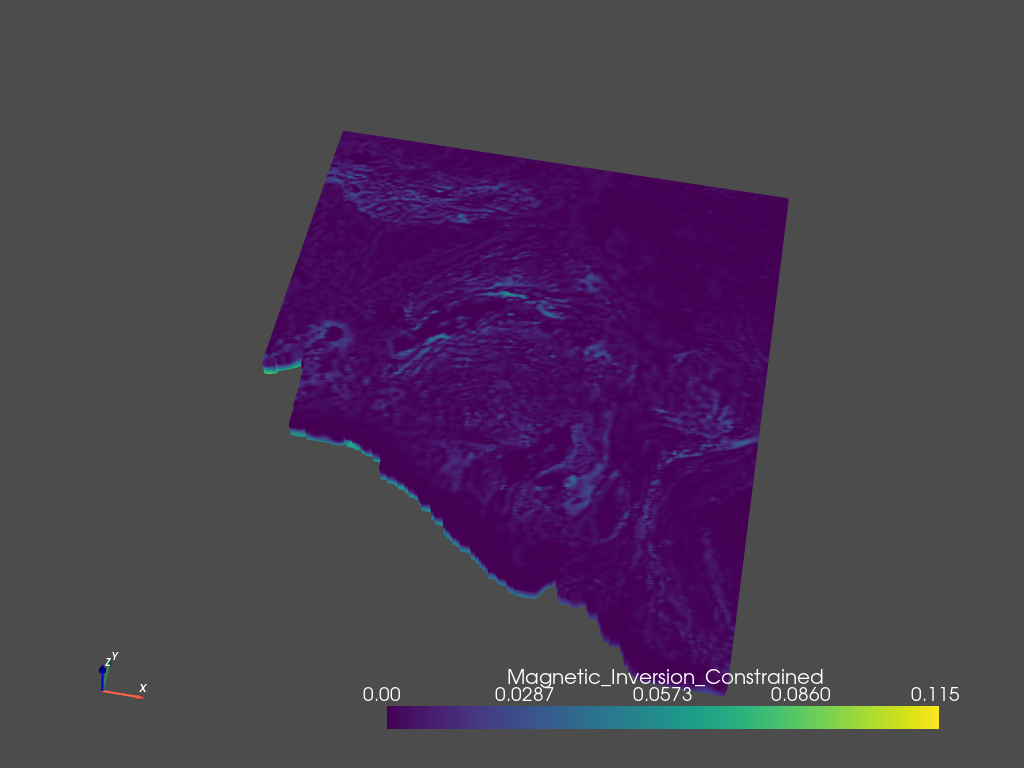

[(890333.7614313492, 4462331.192843254, 3228170.0914507937),
 (482000.0, 6504000.0, -38500.0),
 (0.0, 0.0, 1.0)]

In [120]:
thresm.plot(scalars='Magnetic_Inversion_Constrained', cpos=(1,-5,8))

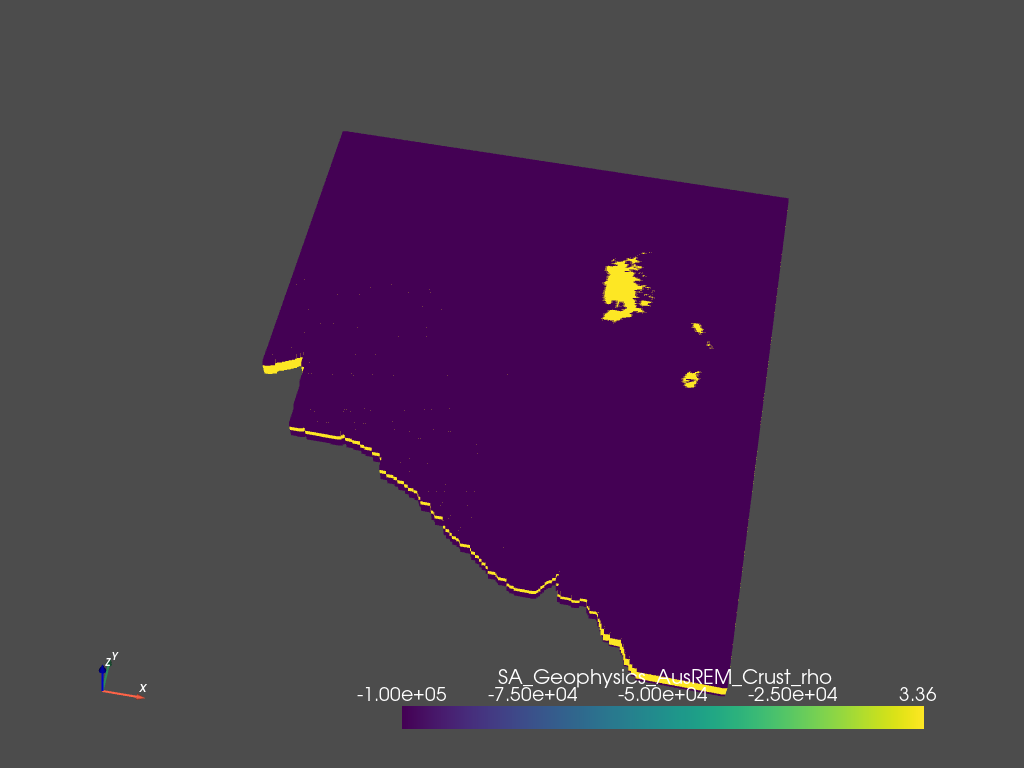

[(890333.7614313492, 4462331.192843254, 3228170.0914507937),
 (482000.0, 6504000.0, -38500.0),
 (0.0, 0.0, 1.0)]

In [175]:
thresm.plot(scalars='SA_Geophysics_AusREM_Crust_rho', cpos=(1,-5,8))

In [197]:
from pyvista import examples

dataset = examples.load_uniform()
dataset.set_active_scalars("Spatial Point Data")

# Apply a threshold over a data range
threshed = dataset.threshold([100, 500])

outline = dataset.outline()
dataset.threshold(value=0.05,  all_scalars=True)

In [200]:
dataset.threshold(value=0.05,  all_scalars=True)

ValueError: Setting `all_scalars=True` and designating `scalars` is incompatible.  Set one or the other but not both

In [199]:
print(pv.Report())


--------------------------------------------------------------------------------
  Date: Wed Nov 03 18:05:04 2021 Cen. Australia Daylight Time

                OS : Windows
            CPU(s) : 12
           Machine : AMD64
      Architecture : 64bit
               RAM : 127.8 GiB
       Environment : Jupyter
        GPU Vendor : Intel
      GPU Renderer : Intel(R) UHD Graphics P630
       GPU Version : 4.5.0 - Build 27.20.100.8280

  Python 3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 15:50:08)
  [MSC v.1916 64 bit (AMD64)]

           pyvista : 0.29.1
               vtk : 9.0.1
             numpy : 1.20.2
           imageio : 2.9.0
           appdirs : 1.4.4
            scooby : 0.5.7
            meshio : 4.3.12
        matplotlib : 3.4.3
         pyvistaqt : 0.3.0
             PyQt5 : 5.12.3
           IPython : 7.22.0
          colorcet : 1.0.0
             scipy : 1.6.2
              tqdm : 4.60.0

  Intel(R) Math Kernel Library Version 2020.0.4 Product Build 20200917

In [88]:
voxelizer3 = PVGeo.filters.VoxelizePoints(unique=True, estimate=False)
voxelizer3.set_deltas(xarray_all, yarray_all, zarray_all)
grid3 = voxelizer3.apply(point_cloud_all)
#grid2.plot(notebook=True, show_grid=True)


p = pv.Plotter(notebook=False)
p.add_mesh(grid3)
p.show_grid()
p.add_axes()
p.show()


[(3049413.71097497, 9071413.710974969, 2518163.71097497),
 (484000.0, 6506000.0, -47250.0),
 (-0.4082482904638632, -0.408248290463863, 0.816496580927726)]

In [89]:
grid3

UnstructuredGrid (0x1e20c3226a0)
  N Cells:	8196200
  N Points:	8731008
  X Bounds:	-2.820e+05, 1.250e+06
  Y Bounds:	5.650e+06, 7.362e+06
  Z Bounds:	-1.030e+05, 8.500e+03
  N Arrays:	10

In [90]:
grid3.save(r'J:\Richard_Scott\SA_Geophysics_Reference_Model.vtu')

In [91]:
satest = pv.read(r'J:\Richard_Scott\SA_Geophysics_Reference_Model.vtu')
satest

UnstructuredGrid (0x1e2849051c0)
  N Cells:	8196200
  N Points:	8731008
  X Bounds:	-2.820e+05, 1.250e+06
  Y Bounds:	5.650e+06, 7.362e+06
  Z Bounds:	-1.030e+05, 8.500e+03
  N Arrays:	10

In [92]:
rockthres = satest.threshold(-1.0)
rockthres

vtkThreshold (000001E38E8C6E70)
  Debug: Off
  Modified Time: 15278966
  Reference Count: 2
  Registered Events: (none)
  Executive: 000001E38F47D500
  ErrorCode: No error
  Information: 000001E3A68CC040
  AbortExecute: Off
  Progress: 1
  Progress Text: (None)
  Attribute Mode: UseCellData
  Component Mode: UseSelected
  Selected Component: 0
  All Scalars: 0
  Threshold By Upper
  Lower Threshold: 0
  Upper Threshold: -1
  Precision of the output points: 2
  Use Continuous Cell Range: 0


vtkUnstructuredGrid (000001E22BB25BA0)
  Debug: Off
  Modified Time: 31671619
  Reference Count: 2
  Registered Events: (none)
  Information: 000001E3A68CB820
  Data Released: False
  Global Release Data: Off
  UpdateTime: 31671620
  Field Data:
    Debug: Off
    Modified Time: 15279102
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 8524048
  Number Of Cells: 7992582
  Cell Data:
    Debug: Off
   

UnstructuredGrid (0x1e28490c280)
  N Cells:	7992582
  N Points:	8524048
  X Bounds:	-2.820e+05, 1.246e+06
  Y Bounds:	5.650e+06, 7.358e+06
  Z Bounds:	-9.900e+04, 8.500e+03
  N Arrays:	10

In [94]:
rockthres.plot(scalars='Rock_Unit', notebook=False)

[(1640406.225924218, 6642356.070604695, -11544.80611518155),
 (482000.0, 6504000.0, -45250.0),
 (-0.05294639095378258, 0.2052237629546556, 0.9772818870744003)]

In [96]:
magconthres = satest.threshold(-9999, scalars='Magnetic_Inversion_Constrained')
magconthres

vtkThreshold (000001E38E8CCB10)
  Debug: Off
  Modified Time: 49153148
  Reference Count: 2
  Registered Events: (none)
  Executive: 000001E38F492770
  ErrorCode: No error
  Information: 000001E3A6B358F0
  AbortExecute: Off
  Progress: 1
  Progress Text: (None)
  Attribute Mode: UseCellData
  Component Mode: UseSelected
  Selected Component: 0
  All Scalars: 0
  Threshold By Upper
  Lower Threshold: 0
  Upper Threshold: -9999
  Precision of the output points: 2
  Use Continuous Cell Range: 0


vtkUnstructuredGrid (000001E22BB25600)
  Debug: Off
  Modified Time: 65545787
  Reference Count: 2
  Registered Events: (none)
  Information: 000001E3A6B34810
  Data Released: False
  Global Release Data: Off
  UpdateTime: 65545788
  Field Data:
    Debug: Off
    Modified Time: 49153283
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 3350655
  Number Of Cells: 3029769
  Cell Data:
    Debug: Off


UnstructuredGrid (0x1e284903880)
  N Cells:	3029769
  N Points:	3350655
  X Bounds:	-1.820e+05, 1.146e+06
  Y Bounds:	5.750e+06, 7.258e+06
  Z Bounds:	-7.900e+04, 5.000e+02
  N Arrays:	10

In [102]:
magconthres.plot(scalars='Magnetic_Inversion_Constrained', notebook=False, cmap='jet', opacity=0.5)

[(868354.0116254002, 4472532.708156147, 1623440.052044301),
 (482000.0, 6504000.0, -39250.0),
 (-0.5286347465579959, 0.47516638786609644, 0.7033933526653843)]

In [104]:
#autosave selected window on quit
pl = pv.Plotter(notebook=False)
_ = pl.add_mesh(magconthres)
pl.show(auto_close=False)  
pl.show(screenshot='my_image.png')  

[(3752916.9595603338, 5840382.732986751, -2027467.628877125),
 (482000.0, 6504000.0, -39250.0),
 (0.363277275915327, -0.5218413418514332, 0.7718233183431524)]